# Support Vector Machine

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## RandomSearch (ROC AUC max)

### Tunability Analysis

In [38]:
# load data - SVM 
svm_1_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_1.csv')
svm_2_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_2.csv')
svm_3_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_3.csv')
svm_4_random = pd.read_csv('RandomSearch/SupportVectorMachine/svm_4.csv')

svm_1_random = svm_1_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_1_random.columns = ['roc_auc_1', 'kernel','C','gamma','degree']
svm_2_random = svm_2_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_2_random.columns = ['roc_auc_2', 'kernel','C','gamma','degree']
svm_3_random = svm_3_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_3_random.columns = ['roc_auc_3', 'kernel','C','gamma','degree']
svm_4_random = svm_4_random[['roc_auc', 'model__kernel','model__C','model__gamma','model__degree']]
svm_4_random.columns = ['roc_auc_4', 'kernel','C','gamma','degree']

# we dont do scaling for roc_auc, because it does not make sense

In [39]:
# load data - CatBoost
catboost_1_random = pd.read_csv('RandomSearch/CatBoost/catboost_1.csv')
catboost_2_random = pd.read_csv('RandomSearch/CatBoost/catboost_2.csv')
catboost_3_random = pd.read_csv('RandomSearch/CatBoost/catboost_3.csv')
catboost_4_random = pd.read_csv('RandomSearch/CatBoost/catboost_4.csv')

catboost_1_random = catboost_1_random[['brier_score','roc_auc', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']]
catboost_1_random.columns = ['brier_score_1','roc_auc_1', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']
catboost_2_random = catboost_2_random[['brier_score','roc_auc', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']]
catboost_2_random.columns = ['brier_score_2','roc_auc_2', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']
catboost_3_random = catboost_3_random[['brier_score','roc_auc', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']]
catboost_3_random.columns = ['brier_score_3','roc_auc_3', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']
catboost_4_random = catboost_4_random[['brier_score','roc_auc', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']]
catboost_4_random.columns = ['brier_score_4','roc_auc_4', 'model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']

# we dont do scaling for roc_auc, because it does not make sense

In [40]:
# load data - ExtraTreesClassifier
ExtraTreesClassifier_1_random = pd.read_csv('RandomSearch/ExtraTreesClassifier/extra_trees_1.csv')
ExtraTreesClassifier_2_random = pd.read_csv('RandomSearch/ExtraTreesClassifier/extra_trees_2.csv')
ExtraTreesClassifier_3_random = pd.read_csv('RandomSearch/ExtraTreesClassifier/extra_trees_3.csv')
ExtraTreesClassifier_4_random = pd.read_csv('RandomSearch/ExtraTreesClassifier/extra_trees_4.csv')

ExtraTreesClassifier_1_random = ExtraTreesClassifier_1_random[['roc_auc', 'model__n_estimators','model__max_depth','model__min_samples_split','model__min_samples_leaf','model__min_weight_fraction_leaf','model__max_leaf_nodes','model__max_features', 'model__criterion']]
ExtraTreesClassifier_1_random.columns = ['roc_auc_1', 'n_estimators','max_depth','min_samples_split','min_samples_leaf', 'min_weight_fraction_leaf', 'max_leaf_nodes', 'max_features', 'criterion']
ExtraTreesClassifier_2_random = ExtraTreesClassifier_2_random[['roc_auc', 'model__n_estimators','model__max_depth','model__min_samples_split','model__min_samples_leaf','model__min_weight_fraction_leaf','model__max_leaf_nodes','model__max_features', 'model__criterion']]
ExtraTreesClassifier_2_random.columns = ['roc_auc_2', 'n_estimators','max_depth','min_samples_split','min_samples_leaf', 'min_weight_fraction_leaf', 'max_leaf_nodes', 'max_features', 'criterion']
ExtraTreesClassifier_3_random = ExtraTreesClassifier_3_random[['roc_auc', 'model__n_estimators','model__max_depth','model__min_samples_split','model__min_samples_leaf','model__min_weight_fraction_leaf','model__max_leaf_nodes','model__max_features', 'model__criterion']]
ExtraTreesClassifier_3_random.columns = ['roc_auc_3', 'n_estimators','max_depth','min_samples_split','min_samples_leaf', 'min_weight_fraction_leaf', 'max_leaf_nodes', 'max_features', 'criterion']
ExtraTreesClassifier_4_random = ExtraTreesClassifier_4_random[['roc_auc', 'model__n_estimators','model__max_depth','model__min_samples_split','model__min_samples_leaf','model__min_weight_fraction_leaf','model__max_leaf_nodes','model__max_features', 'model__criterion']]
ExtraTreesClassifier_4_random.columns = ['roc_auc_4', 'n_estimators','max_depth','min_samples_split','min_samples_leaf', 'min_weight_fraction_leaf', 'max_leaf_nodes', 'max_features', 'criterion']

# we dont do scaling for roc_auc, because it does not make sense

In [41]:
# find the best parameters for each dataset (theta_star_1, theta_star_2, theta_star_3, theta_star_4) - SVM
svm_theta_star_1 = svm_1_random.loc[svm_1_random['roc_auc_1'].idxmax()]
svm_theta_star_2 = svm_2_random.loc[svm_2_random['roc_auc_2'].idxmax()]
svm_theta_star_3 = svm_3_random.loc[svm_3_random['roc_auc_3'].idxmax()]
svm_theta_star_4 = svm_4_random.loc[svm_4_random['roc_auc_4'].idxmax()]

print(svm_theta_star_1)
print('----------------')
print(svm_theta_star_2)
print('----------------')
print(svm_theta_star_3)
print('----------------')
print(svm_theta_star_4)


roc_auc_1    0.847658
kernel         linear
C            0.007812
gamma           128.0
degree              3
Name: 295, dtype: object
----------------
roc_auc_2    0.552477
kernel            rbf
C                 8.0
gamma            32.0
degree              4
Name: 207, dtype: object
----------------
roc_auc_3    0.785219
kernel        sigmoid
C            0.001953
gamma        0.000977
degree              2
Name: 2, dtype: object
----------------
roc_auc_4    0.737892
kernel         linear
C            0.003906
gamma        0.003906
degree              2
Name: 300, dtype: object


In [42]:
# find the best parameters for each dataset (theta_star_1, theta_star_2, theta_star_3, theta_star_4) - CatBoost
catboost_theta_star_1 = catboost_1_random.loc[catboost_1_random['roc_auc_1'].idxmax()]
catboost_theta_star_2 = catboost_2_random.loc[catboost_2_random['roc_auc_2'].idxmax()]
catboost_theta_star_3 = catboost_3_random.loc[catboost_3_random['roc_auc_3'].idxmax()]
catboost_theta_star_4 = catboost_4_random.loc[catboost_4_random['roc_auc_4'].idxmax()]

print(catboost_theta_star_1)
print('----------------')
print(catboost_theta_star_2)
print('----------------')
print(catboost_theta_star_3)
print('----------------')
print(catboost_theta_star_4)


brier_score_1                 0.122583
roc_auc_1                     0.891713
model__iterations           170.000000
model__learning_rate          0.132500
model__depth                  3.000000
model__l2_leaf_reg            9.000000
model__colsample_bylevel      1.000000
Name: 130, dtype: float64
----------------
brier_score_2                 0.220801
roc_auc_2                     0.694302
model__iterations           200.000000
model__learning_rate          0.132500
model__depth                  7.000000
model__l2_leaf_reg           11.000000
model__colsample_bylevel      0.775000
Name: 415, dtype: float64
----------------
brier_score_3                 0.085125
roc_auc_3                     0.939469
model__iterations           200.000000
model__learning_rate          0.132500
model__depth                  7.000000
model__l2_leaf_reg           11.000000
model__colsample_bylevel      0.775000
Name: 415, dtype: float64
----------------
brier_score_4                0.178445
roc_auc_4     

In [43]:
# find the best parameters for each dataset (theta_star_1, theta_star_2, theta_star_3, theta_star_4) - ExtraTreesClassifier
extra_trees_theta_star_1 = ExtraTreesClassifier_1_random.loc[ExtraTreesClassifier_1_random['roc_auc_1'].idxmax()]
extra_trees_theta_star_2 = ExtraTreesClassifier_2_random.loc[ExtraTreesClassifier_2_random['roc_auc_2'].idxmax()]
extra_trees_theta_star_3 = ExtraTreesClassifier_3_random.loc[ExtraTreesClassifier_3_random['roc_auc_3'].idxmax()]
extra_trees_theta_star_4 = ExtraTreesClassifier_4_random.loc[ExtraTreesClassifier_4_random['roc_auc_4'].idxmax()]

print(extra_trees_theta_star_1)
print('----------------')
print(extra_trees_theta_star_2)
print('----------------')
print(extra_trees_theta_star_3)
print('----------------')
print(extra_trees_theta_star_4)


roc_auc_1                   0.820003
n_estimators                       8
max_depth                        3.0
min_samples_split                 39
min_samples_leaf                  28
min_weight_fraction_leaf    0.026316
max_leaf_nodes                     2
max_features                     NaN
criterion                       gini
Name: 1, dtype: object
----------------
roc_auc_2                             0.645633
n_estimators                               745
max_depth                                 15.0
min_samples_split                           47
min_samples_leaf                            12
min_weight_fraction_leaf                   0.0
max_leaf_nodes                            48.0
max_features                0.5263157894736842
criterion                              entropy
Name: 316, dtype: object
----------------
roc_auc_3                             0.904579
n_estimators                                21
max_depth                                 17.0
min_samples_split    

In [44]:
# find the best parameters (theta_star) for 4 our datasets on average - SVM

svm_random = pd.concat([svm_1_random[['kernel','C','gamma','degree']], svm_1_random[['roc_auc_1']], svm_2_random[['roc_auc_2']], svm_3_random[['roc_auc_3']], svm_4_random[['roc_auc_4']]], axis=1)

svm_random['mean_roc_auc_all_4'] = svm_random[['roc_auc_1', 'roc_auc_2', 'roc_auc_3', 'roc_auc_4']].mean(axis=1)
svm = svm_random.sort_values(by='mean_roc_auc_all_4', ascending=False)

svm_theta_star = svm.loc[svm_random['mean_roc_auc_all_4'].idxmax()]
# So the best parameters of SVM for these 4 datasets on average are theta_star
print(svm_theta_star)

kernel                 sigmoid
C                     0.001953
gamma                 0.000977
degree                       2
roc_auc_1             0.843982
roc_auc_2             0.496137
roc_auc_3             0.785219
roc_auc_4             0.724614
mean_roc_auc_all_4    0.712488
Name: 2, dtype: object


In [45]:
# find the best parameters (theta_star) for 4 our datasets on average - CatBoost

catboost_random = pd.concat([catboost_1_random[['model__iterations','model__learning_rate','model__depth','model__l2_leaf_reg','model__colsample_bylevel']], catboost_1_random[['roc_auc_1']], catboost_2_random[['roc_auc_2']], catboost_3_random[['roc_auc_3']], catboost_4_random[['roc_auc_4']]], axis=1)

catboost_random['mean_roc_auc_all_4'] = catboost_random[['roc_auc_1', 'roc_auc_2', 'roc_auc_3', 'roc_auc_4']].mean(axis=1)
catboost = catboost_random.sort_values(by='mean_roc_auc_all_4', ascending=False)

catboost_theta_star = catboost.loc[catboost_random['mean_roc_auc_all_4'].idxmax()]
# So the best parameters of catboost for these 4 datasets on average are theta_star
print(catboost_theta_star)

model__iterations           200.000000
model__learning_rate          0.132500
model__depth                  7.000000
model__l2_leaf_reg           11.000000
model__colsample_bylevel      0.775000
roc_auc_1                     0.889567
roc_auc_2                     0.694302
roc_auc_3                     0.939469
roc_auc_4                     0.799372
mean_roc_auc_all_4            0.830678
Name: 415, dtype: float64


In [46]:
# find the best parameters (theta_star) for 4 our datasets on average - ExtraTreesClassifier

ExtraTreesClassifier_random = pd.concat([ExtraTreesClassifier_1_random[['n_estimators','max_depth','min_samples_split','min_samples_leaf', 'min_weight_fraction_leaf', 'max_leaf_nodes', 'max_features', 'criterion']], ExtraTreesClassifier_1_random[['roc_auc_1']], ExtraTreesClassifier_2_random[['roc_auc_2']], ExtraTreesClassifier_3_random[['roc_auc_3']], ExtraTreesClassifier_4_random[['roc_auc_4']]], axis=1)

ExtraTreesClassifier_random['mean_roc_auc_all_4'] = ExtraTreesClassifier_random[['roc_auc_1', 'roc_auc_2', 'roc_auc_3', 'roc_auc_4']].mean(axis=1)
ExtraTreesClassifier = ExtraTreesClassifier_random.sort_values(by='mean_roc_auc_all_4', ascending=False)

extra_trees_theta_star = ExtraTreesClassifier.loc[ExtraTreesClassifier_random['mean_roc_auc_all_4'].idxmax()]
# So the best parameters of ExtraTreesClassifier for these 4 datasets on average are theta_star
print(extra_trees_theta_star)

n_estimators                     NaN
max_depth                        NaN
min_samples_split                NaN
min_samples_leaf                 NaN
min_weight_fraction_leaf         NaN
max_leaf_nodes                   NaN
max_features                     NaN
criterion                        NaN
roc_auc_1                        NaN
roc_auc_2                   0.645633
roc_auc_3                   0.901922
roc_auc_4                   0.798903
mean_roc_auc_all_4          0.782153
Name: 316, dtype: object


In [47]:
# overall tunability of SVM per dataset, when theta_star is taken from our parameters grid - SVM

# our R function is -roc_auc so:
d_1 = -svm_theta_star['roc_auc_1']-(-svm_theta_star_1['roc_auc_1'])
d_2 = -svm_theta_star['roc_auc_2']-(-svm_theta_star_2['roc_auc_2'])
d_3 = -svm_theta_star['roc_auc_3']-(-svm_theta_star_3['roc_auc_3'])
d_4 = -svm_theta_star['roc_auc_4']-(-svm_theta_star_4['roc_auc_4'])

print('tunability of SVM for dataset 1:', d_1)
print('tunability of SVM for dataset 2:', d_2)
print('tunability of SVM for dataset 3:', d_3)
print('tunability of SVM for dataset 4:', d_4)

svm_tunability_random_search = [d_1, d_2, d_3, d_4]

tunability of SVM for dataset 1: 0.003676874591858059
tunability of SVM for dataset 2: 0.0563394134626124
tunability of SVM for dataset 3: 0.0
tunability of SVM for dataset 4: 0.013278137716415506


In [48]:
# overall tunability of catboost per dataset, when theta_star is taken from our parameters grid - CatBoost

# our R function is -roc_auc so:
d_1 = -catboost_theta_star['roc_auc_1']-(-catboost_theta_star_1['roc_auc_1'])
d_2 = -catboost_theta_star['roc_auc_2']-(-catboost_theta_star_2['roc_auc_2'])
d_3 = -catboost_theta_star['roc_auc_3']-(-catboost_theta_star_3['roc_auc_3'])
d_4 = -catboost_theta_star['roc_auc_4']-(-catboost_theta_star_4['roc_auc_4'])

print('tunability of CatBoost for dataset 1:', d_1)
print('tunability of CatBoost for dataset 2:', d_2)
print('tunability of CatBoost for dataset 3:', d_3)
print('tunability of CatBoost for dataset 4:', d_4)

catboost_tunability_random_search = [d_1, d_2, d_3, d_4]

tunability of CatBoost for dataset 1: 0.002145640565561213
tunability of CatBoost for dataset 2: 0.0
tunability of CatBoost for dataset 3: 0.0
tunability of CatBoost for dataset 4: 0.00796773381756466


In [49]:
# overall tunability of ExtraTreesClassifier per dataset, when theta_star is taken from our parameters grid - ExtraTreesClassifier

# our R function is -roc_auc so:
d_1 = -extra_trees_theta_star['roc_auc_1']-(-extra_trees_theta_star_1['roc_auc_1'])
d_2 = -extra_trees_theta_star['roc_auc_2']-(-extra_trees_theta_star_2['roc_auc_2'])
d_3 = -extra_trees_theta_star['roc_auc_3']-(-extra_trees_theta_star_3['roc_auc_3'])
d_4 = -extra_trees_theta_star['roc_auc_4']-(-extra_trees_theta_star_4['roc_auc_4'])

print('tunability of ExtraTreesClassifier for dataset 1:', d_1)
print('tunability of ExtraTreesClassifier for dataset 2:', d_2)
print('tunability of ExtraTreesClassifier for dataset 3:', d_3)
print('tunability of ExtraTreesClassifier for dataset 4:', d_4)

ExtraTreesClassifier_tunability_random_search = [d_1, d_2, d_3, d_4]

tunability of ExtraTreesClassifier for dataset 1: nan
tunability of ExtraTreesClassifier for dataset 2: 0.0
tunability of ExtraTreesClassifier for dataset 3: 0.0026571959673900025
tunability of ExtraTreesClassifier for dataset 4: 0.0


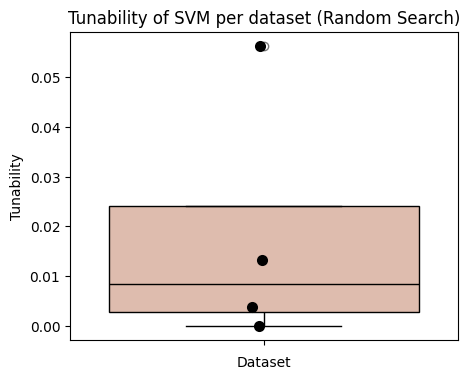

In [50]:
# BoxPlot x Jitter Strips of tunability of SVM per dataset (theta_star is taken from our parameters grid) - SVM
plt.figure(figsize=(5, 4))

sns.boxplot(data=svm_tunability_random_search, 
            color="#E6B9A6", 
            boxprops=dict(edgecolor='black'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'), 
            medianprops=dict(color='black')
            )
sns.stripplot(data=svm_tunability_random_search, jitter=True, color="black", size=8, edgecolor='black')
plt.title('Tunability of SVM per dataset (Random Search)')
plt.ylabel('Tunability')
plt.xlabel('Dataset')
plt.show()


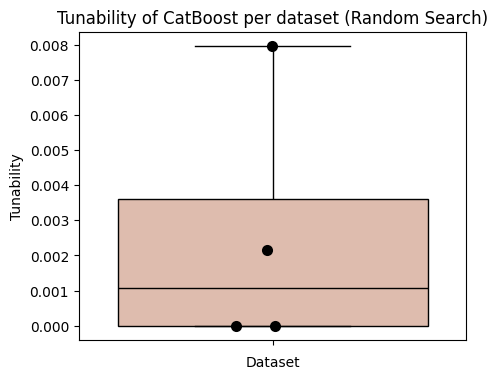

In [51]:
# BoxPlot x Jitter Strips of tunability of CatBoost per dataset (theta_star is taken from our parameters grid) - CatBoost
plt.figure(figsize=(5, 4))

sns.boxplot(data=catboost_tunability_random_search, 
            color="#E6B9A6", 
            boxprops=dict(edgecolor='black'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'), 
            medianprops=dict(color='black')
            )
sns.stripplot(data=catboost_tunability_random_search, jitter=True, color="black", size=8, edgecolor='black')
plt.title('Tunability of CatBoost per dataset (Random Search)')
plt.ylabel('Tunability')
plt.xlabel('Dataset')
plt.show()


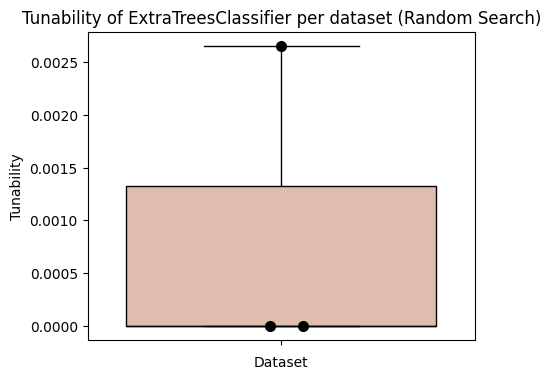

In [52]:
# BoxPlot x Jitter Strips of tunability of ExtraTreesClassifier per dataset (theta_star is taken from our parameters grid) - ExtraTreesClassifier
plt.figure(figsize=(5, 4))

sns.boxplot(data=ExtraTreesClassifier_tunability_random_search, 
            color="#E6B9A6", 
            boxprops=dict(edgecolor='black'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'), 
            medianprops=dict(color='black')
            )
sns.stripplot(data=ExtraTreesClassifier_tunability_random_search, jitter=True, color="black", size=8, edgecolor='black')
plt.title('Tunability of ExtraTreesClassifier per dataset (Random Search)')
plt.ylabel('Tunability')
plt.xlabel('Dataset')
plt.show()


In [53]:
print('---------------------------------------------------------------------')
print(svm_tunability_random_search)
print('---------------------------------------------------------------------')
print(ExtraTreesClassifier_tunability_random_search)
print('---------------------------------------------------------------------')
print(catboost_tunability_random_search)
print('---------------------------------------------------------------------')
svm_tunability_random_search + ExtraTreesClassifier_tunability_random_search + catboost_tunability_random_search

---------------------------------------------------------------------
[0.003676874591858059, 0.0563394134626124, 0.0, 0.013278137716415506]
---------------------------------------------------------------------
[nan, 0.0, 0.0026571959673900025, 0.0]
---------------------------------------------------------------------
[0.002145640565561213, 0.0, 0.0, 0.00796773381756466]
---------------------------------------------------------------------


[0.003676874591858059,
 0.0563394134626124,
 0.0,
 0.013278137716415506,
 nan,
 0.0,
 0.0026571959673900025,
 0.0,
 0.002145640565561213,
 0.0,
 0.0,
 0.00796773381756466]

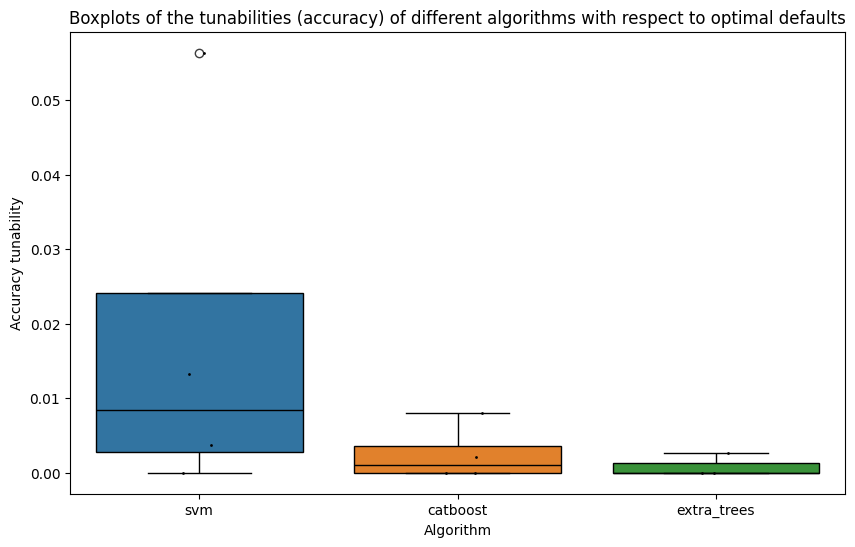

In [67]:
# Boxplot for all algorithms
data_for_plot_all = pd.DataFrame()

data_for_plot_all['svm']=svm_tunability_random_search
data_for_plot_all['catboost']=catboost_tunability_random_search
data_for_plot_all['extra_trees']=ExtraTreesClassifier_tunability_random_search


plt.figure(figsize=(10, 6))
sns.boxplot(data=data_for_plot_all, boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(data=data_for_plot_all, jitter=True, color="black", size=2, edgecolor='black')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy tunability")
plt.title("Boxplots of the tunabilities (accuracy) of different algorithms with respect to optimal defaults")

plt.show()

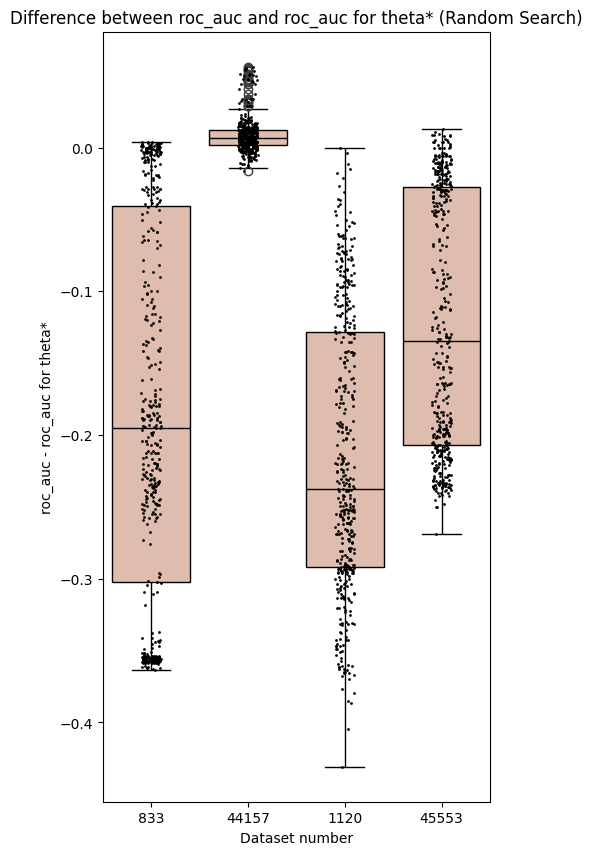

In [55]:
# roc_auc_minus_roc_auc_for_best_theta_on_average for each dataset - SVM
data_for_plot = pd.DataFrame()
data_for_plot['833']=svm_1_random['roc_auc_1']-svm_theta_star['roc_auc_1']
data_for_plot['44157']=svm_2_random['roc_auc_2']-svm_theta_star['roc_auc_2']
data_for_plot['1120']=svm_3_random['roc_auc_3']-svm_theta_star['roc_auc_3']
data_for_plot['45553']=svm_4_random['roc_auc_4']-svm_theta_star['roc_auc_4']

# BoxPlot x Jitter Strips of Difference between roc_auc and roc_auc for theta* (Random Search) for each dataset
plt.figure(figsize=(5, 10))

sns.boxplot(data=data_for_plot, color="#E6B9A6", boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(data=data_for_plot, jitter=True, color="black", size=2, edgecolor='black')
plt.title('Difference between roc_auc and roc_auc for theta* (Random Search)')
plt.ylabel('roc_auc - roc_auc for theta*')
plt.xlabel('Dataset number')
plt.show()

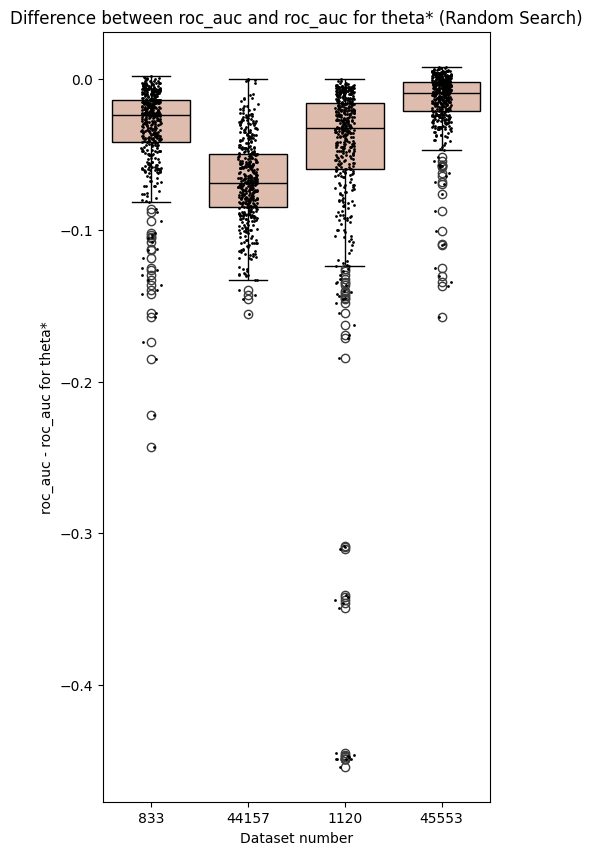

In [56]:
# roc_auc_minus_roc_auc_for_best_theta_on_average for each dataset - CatBoost
data_for_plot = pd.DataFrame()
data_for_plot['833']=catboost_1_random['roc_auc_1']-catboost_theta_star['roc_auc_1']
data_for_plot['44157']=catboost_2_random['roc_auc_2']-catboost_theta_star['roc_auc_2']
data_for_plot['1120']=catboost_3_random['roc_auc_3']-catboost_theta_star['roc_auc_3']
data_for_plot['45553']=catboost_4_random['roc_auc_4']-catboost_theta_star['roc_auc_4']

# BoxPlot x Jitter Strips of Difference between roc_auc and roc_auc for theta* (Random Search) for each dataset
plt.figure(figsize=(5, 10))

sns.boxplot(data=data_for_plot, color="#E6B9A6", boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(data=data_for_plot, jitter=True, color="black", size=2, edgecolor='black')
plt.title('Difference between roc_auc and roc_auc for theta* (Random Search)')
plt.ylabel('roc_auc - roc_auc for theta*')
plt.xlabel('Dataset number')
plt.show()

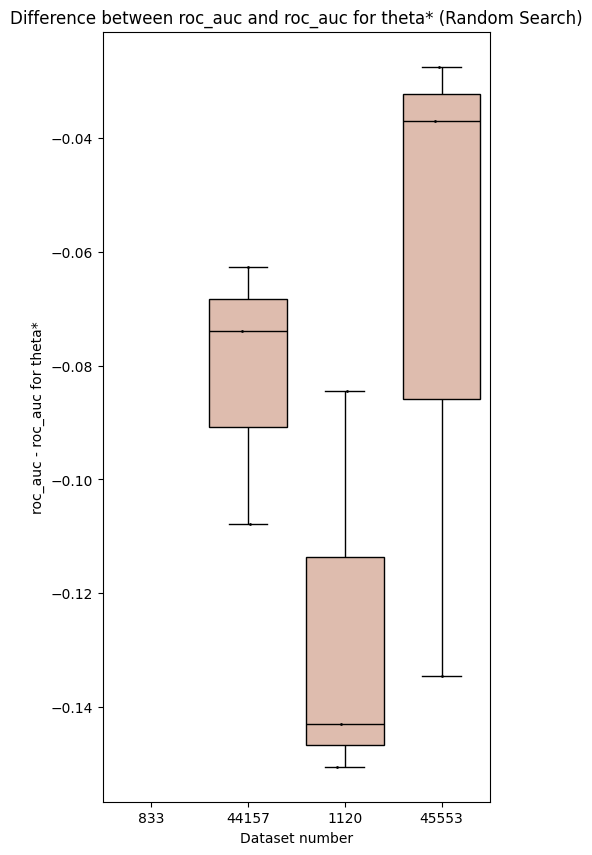

In [57]:
# roc_auc_minus_roc_auc_for_best_theta_on_average for each dataset - ExtraTreesClassifier 
data_for_plot = pd.DataFrame()
data_for_plot['833']=ExtraTreesClassifier_1_random['roc_auc_1']-extra_trees_theta_star['roc_auc_1']
data_for_plot['44157']=ExtraTreesClassifier_2_random['roc_auc_2']-extra_trees_theta_star['roc_auc_2']
data_for_plot['1120']=ExtraTreesClassifier_3_random['roc_auc_3']-extra_trees_theta_star['roc_auc_3']
data_for_plot['45553']=ExtraTreesClassifier_4_random['roc_auc_4']-extra_trees_theta_star['roc_auc_4']

# BoxPlot x Jitter Strips of Difference between roc_auc and roc_auc for theta* (Random Search) for each dataset
plt.figure(figsize=(5, 10))

sns.boxplot(data=data_for_plot, color="#E6B9A6", boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(data=data_for_plot, jitter=True, color="black", size=2, edgecolor='black')
plt.title('Difference between roc_auc and roc_auc for theta* (Random Search)')
plt.ylabel('roc_auc - roc_auc for theta*')
plt.xlabel('Dataset number')
plt.show()

## BayesSearch (ROC AUC max)

In [58]:
# load data - SVM
svm_1_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_1.csv')
svm_2_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_2.csv')
svm_3_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_3.csv')
svm_4_bayes = pd.read_csv('BayesSearch/SupportVectorMachine/svm_4.csv')

svm_1_bayes = svm_1_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_1_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_1']
svm_2_bayes = svm_2_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_2_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_2']
svm_3_bayes = svm_3_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_3_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_3']
svm_4_bayes = svm_4_bayes[['param_model__C', 'param_model__degree', 'param_model__gamma', 'param_model__kernel', 'mean_test_score']]
svm_4_bayes.columns = ['C', 'degree', 'gamma', 'kernel', 'roc_auc_4']

In [59]:
# load data - CatBoost
catboost_1_bayes = pd.read_csv('BayesSearch/CatBoost/catboost_1.csv')
catboost_2_bayes = pd.read_csv('BayesSearch/CatBoost/catboost_2.csv')
catboost_3_bayes = pd.read_csv('BayesSearch/CatBoost/catboost_3.csv')
catboost_4_bayes = pd.read_csv('BayesSearch/CatBoost/catboost_4.csv')

catboost_1_bayes = catboost_1_bayes[['param_model__colsample_bylevel', 'param_model__depth', 'param_model__iterations', 'param_model__l2_leaf_reg', 'param_model__learning_rate','mean_test_score']]
catboost_1_bayes.columns = ['colsample_bylevel', 'depth', 'iterations', 'l2_leaf_reg', 'learning_rate', 'roc_auc_1']
catboost_2_bayes = catboost_2_bayes[['param_model__colsample_bylevel', 'param_model__depth', 'param_model__iterations', 'param_model__l2_leaf_reg', 'param_model__learning_rate','mean_test_score']]
catboost_2_bayes.columns = ['colsample_bylevel', 'depth', 'iterations', 'l2_leaf_reg', 'learning_rate', 'roc_auc_2']
catboost_3_bayes = catboost_3_bayes[['param_model__colsample_bylevel', 'param_model__depth', 'param_model__iterations', 'param_model__l2_leaf_reg', 'param_model__learning_rate','mean_test_score']]
catboost_3_bayes.columns = ['colsample_bylevel', 'depth', 'iterations', 'l2_leaf_reg', 'learning_rate', 'roc_auc_3']
catboost_4_bayes = catboost_4_bayes[['param_model__colsample_bylevel', 'param_model__depth', 'param_model__iterations', 'param_model__l2_leaf_reg', 'param_model__learning_rate','mean_test_score']]
catboost_4_bayes.columns = ['colsample_bylevel', 'depth', 'iterations', 'l2_leaf_reg', 'learning_rate','roc_auc_4']

In [60]:
# load data - ExtraTreesClassifier
ExtraTreesClassifier_1_bayes = pd.read_csv('BayesSearch/ExtraTreesClassifier/extra_trees_1.csv')
ExtraTreesClassifier_2_bayes = pd.read_csv('BayesSearch/ExtraTreesClassifier/extra_trees_2.csv')
ExtraTreesClassifier_3_bayes = pd.read_csv('BayesSearch/ExtraTreesClassifier/extra_trees_3.csv')
ExtraTreesClassifier_4_bayes = pd.read_csv('BayesSearch/ExtraTreesClassifier/extra_trees_4.csv')

ExtraTreesClassifier_1_bayes = ExtraTreesClassifier_1_bayes[['param_model__criterion', 'param_model__max_depth', 'param_model__max_features', 'param_model__max_leaf_nodes', 'param_model__min_samples_leaf', 'param_model__min_samples_split',	'param_model__min_weight_fraction_leaf', 'param_model__n_estimators', 'mean_test_score']]
ExtraTreesClassifier_1_bayes.columns = ['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'roc_auc_1']
ExtraTreesClassifier_2_bayes = ExtraTreesClassifier_2_bayes[['param_model__criterion', 'param_model__max_depth', 'param_model__max_features', 'param_model__max_leaf_nodes', 'param_model__min_samples_leaf', 'param_model__min_samples_split',	'param_model__min_weight_fraction_leaf', 'param_model__n_estimators', 'mean_test_score']]
ExtraTreesClassifier_2_bayes.columns = ['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'roc_auc_2']
ExtraTreesClassifier_3_bayes = ExtraTreesClassifier_3_bayes[['param_model__criterion', 'param_model__max_depth', 'param_model__max_features', 'param_model__max_leaf_nodes', 'param_model__min_samples_leaf', 'param_model__min_samples_split',	'param_model__min_weight_fraction_leaf', 'param_model__n_estimators', 'mean_test_score']]
ExtraTreesClassifier_3_bayes.columns = ['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'roc_auc_3']
ExtraTreesClassifier_4_bayes = ExtraTreesClassifier_4_bayes[['param_model__criterion', 'param_model__max_depth', 'param_model__max_features', 'param_model__max_leaf_nodes', 'param_model__min_samples_leaf', 'param_model__min_samples_split',	'param_model__min_weight_fraction_leaf', 'param_model__n_estimators', 'mean_test_score']]
ExtraTreesClassifier_4_bayes.columns = ['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators','roc_auc_4']

### Iterations vs roc_auc

In [61]:
# SVM
def get_max_auc(n_iter, dataset, col_name):
    dataset = dataset.head(n_iter)
    return dataset[col_name].max()

svm_max_auc_interations_1_random= np.array([get_max_auc(i, svm_1_random, 'roc_auc_1') for i in range(1, 449)])
svm_max_auc_interations_2_random = np.array([get_max_auc(i, svm_2_random, 'roc_auc_2') for i in range(1, 449)])
svm_max_auc_interations_3_random = np.array([get_max_auc(i, svm_3_random, 'roc_auc_3') for i in range(1, 449)])
svm_max_auc_interations_4_random = np.array([get_max_auc(i, svm_4_random, 'roc_auc_4') for i in range(1, 449)])

svm_max_auc_interations_1_bayes = np.array([get_max_auc(i, svm_1_bayes, 'roc_auc_1') for i in range(1, 100)])
svm_max_auc_interations_2_bayes = np.array([get_max_auc(i, svm_2_bayes, 'roc_auc_2') for i in range(1, 100)])
svm_max_auc_interations_3_bayes = np.array([get_max_auc(i, svm_3_bayes, 'roc_auc_3') for i in range(1, 100)])
svm_max_auc_interations_4_bayes = np.array([get_max_auc(i, svm_4_bayes, 'roc_auc_4') for i in range(1, 100)])

In [62]:
# CatBoost
def get_max_auc(n_iter, dataset, col_name):
    dataset = dataset.head(n_iter)
    return dataset[col_name].max()

catboost_max_auc_interations_1_random= np.array([get_max_auc(i, catboost_1_random, 'roc_auc_1') for i in range(1, 449)])
catboost_max_auc_interations_2_random = np.array([get_max_auc(i, catboost_2_random, 'roc_auc_2') for i in range(1, 449)])
catboost_max_auc_interations_3_random = np.array([get_max_auc(i, catboost_3_random, 'roc_auc_3') for i in range(1, 449)])
catboost_max_auc_interations_4_random = np.array([get_max_auc(i, catboost_4_random, 'roc_auc_4') for i in range(1, 449)])

catboost_max_auc_interations_1_bayes = np.array([get_max_auc(i, catboost_1_bayes, 'roc_auc_1') for i in range(1, 100)])
catboost_max_auc_interations_2_bayes = np.array([get_max_auc(i, catboost_2_bayes, 'roc_auc_2') for i in range(1, 100)])
catboost_max_auc_interations_3_bayes = np.array([get_max_auc(i, catboost_3_bayes, 'roc_auc_3') for i in range(1, 100)])
catboost_max_auc_interations_4_bayes = np.array([get_max_auc(i, catboost_4_bayes, 'roc_auc_4') for i in range(1, 100)])

In [63]:
# ExtraTreesClassifier
def get_max_auc(n_iter, dataset, col_name):
    dataset = dataset.head(n_iter)
    return dataset[col_name].max()

extra_trees_max_auc_interations_1_random= np.array([get_max_auc(i, ExtraTreesClassifier_1_random, 'roc_auc_1') for i in range(1, 449)])
extra_trees_max_auc_interations_2_random = np.array([get_max_auc(i, ExtraTreesClassifier_2_random, 'roc_auc_2') for i in range(1, 449)])
extra_trees_max_auc_interations_3_random = np.array([get_max_auc(i, ExtraTreesClassifier_3_random, 'roc_auc_3') for i in range(1, 449)])
extra_trees_max_auc_interations_4_random = np.array([get_max_auc(i, ExtraTreesClassifier_4_random, 'roc_auc_4') for i in range(1, 449)])

extra_trees_max_auc_interations_1_bayes = np.array([get_max_auc(i, ExtraTreesClassifier_1_bayes, 'roc_auc_1') for i in range(1, 100)])
extra_trees_max_auc_interations_2_bayes = np.array([get_max_auc(i, ExtraTreesClassifier_2_bayes, 'roc_auc_2') for i in range(1, 100)])
extra_trees_max_auc_interations_3_bayes = np.array([get_max_auc(i, ExtraTreesClassifier_3_bayes, 'roc_auc_3') for i in range(1, 100)])
extra_trees_max_auc_interations_4_bayes = np.array([get_max_auc(i, ExtraTreesClassifier_4_bayes, 'roc_auc_4') for i in range(1, 100)])

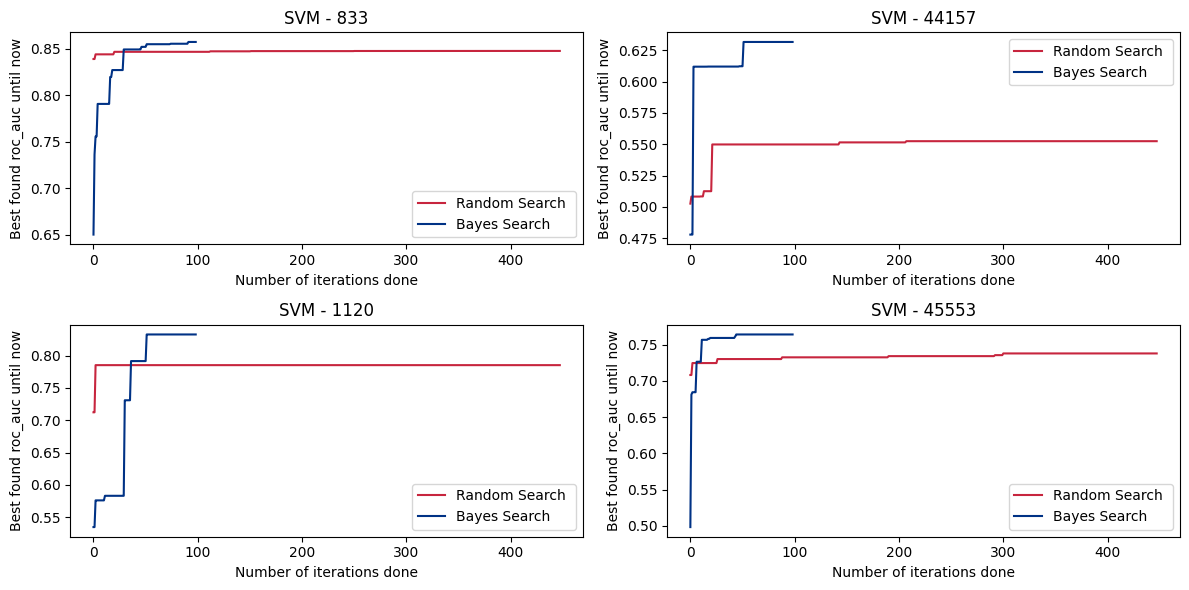

In [64]:
#SVM
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].plot(svm_max_auc_interations_1_random, color='#C7253E', label='Random Search ')
axs[0, 0].plot(svm_max_auc_interations_1_bayes, color='#003285', label='Bayes Search ')
axs[0, 0].set_title('SVM - 833')
axs[0, 0].set_xlabel('Number of iterations done')
axs[0, 0].set_ylabel('Best found roc_auc until now')
axs[0, 0].legend()

axs[0, 1].plot(svm_max_auc_interations_2_random, color='#C7253E', label='Random Search ')
axs[0, 1].plot(svm_max_auc_interations_2_bayes, color='#003285', label='Bayes Search ')
axs[0, 1].set_title('SVM - 44157')
axs[0, 1].set_xlabel('Number of iterations done')
axs[0, 1].set_ylabel('Best found roc_auc until now')
axs[0, 1].legend()

axs[1, 0].plot(svm_max_auc_interations_3_random, color='#C7253E', label='Random Search ')
axs[1, 0].plot(svm_max_auc_interations_3_bayes, color='#003285', label='Bayes Search ')
axs[1, 0].set_title('SVM - 1120')
axs[1, 0].set_xlabel('Number of iterations done')
axs[1, 0].set_ylabel('Best found roc_auc until now')
axs[1, 0].legend()

axs[1, 1].plot(svm_max_auc_interations_4_random, color='#C7253E', label='Random Search ')
axs[1, 1].plot(svm_max_auc_interations_4_bayes, color='#003285', label='Bayes Search ')
axs[1, 1].set_title('SVM - 45553')
axs[1, 1].set_xlabel('Number of iterations done')
axs[1, 1].set_ylabel('Best found roc_auc until now')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

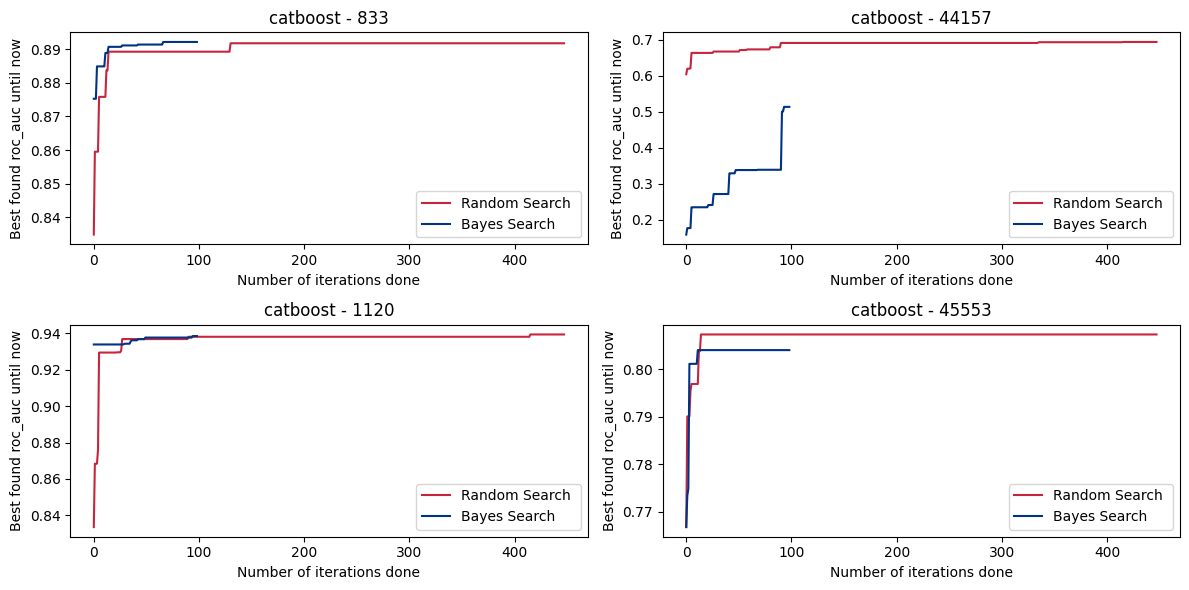

In [65]:
# CatBoost
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].plot(catboost_max_auc_interations_1_random, color='#C7253E', label='Random Search ')
axs[0, 0].plot(catboost_max_auc_interations_1_bayes, color='#003285', label='Bayes Search ')
axs[0, 0].set_title('catboost - 833')
axs[0, 0].set_xlabel('Number of iterations done')
axs[0, 0].set_ylabel('Best found roc_auc until now')
axs[0, 0].legend()

axs[0, 1].plot(catboost_max_auc_interations_2_random, color='#C7253E', label='Random Search ')
axs[0, 1].plot(catboost_max_auc_interations_2_bayes, color='#003285', label='Bayes Search ')
axs[0, 1].set_title('catboost - 44157')
axs[0, 1].set_xlabel('Number of iterations done')
axs[0, 1].set_ylabel('Best found roc_auc until now')
axs[0, 1].legend()

axs[1, 0].plot(catboost_max_auc_interations_3_random, color='#C7253E', label='Random Search ')
axs[1, 0].plot(catboost_max_auc_interations_3_bayes, color='#003285', label='Bayes Search ')
axs[1, 0].set_title('catboost - 1120')
axs[1, 0].set_xlabel('Number of iterations done')
axs[1, 0].set_ylabel('Best found roc_auc until now')
axs[1, 0].legend()

axs[1, 1].plot(catboost_max_auc_interations_4_random, color='#C7253E', label='Random Search ')
axs[1, 1].plot(catboost_max_auc_interations_4_bayes, color='#003285', label='Bayes Search ')
axs[1, 1].set_title('catboost - 45553')
axs[1, 1].set_xlabel('Number of iterations done')
axs[1, 1].set_ylabel('Best found roc_auc until now')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

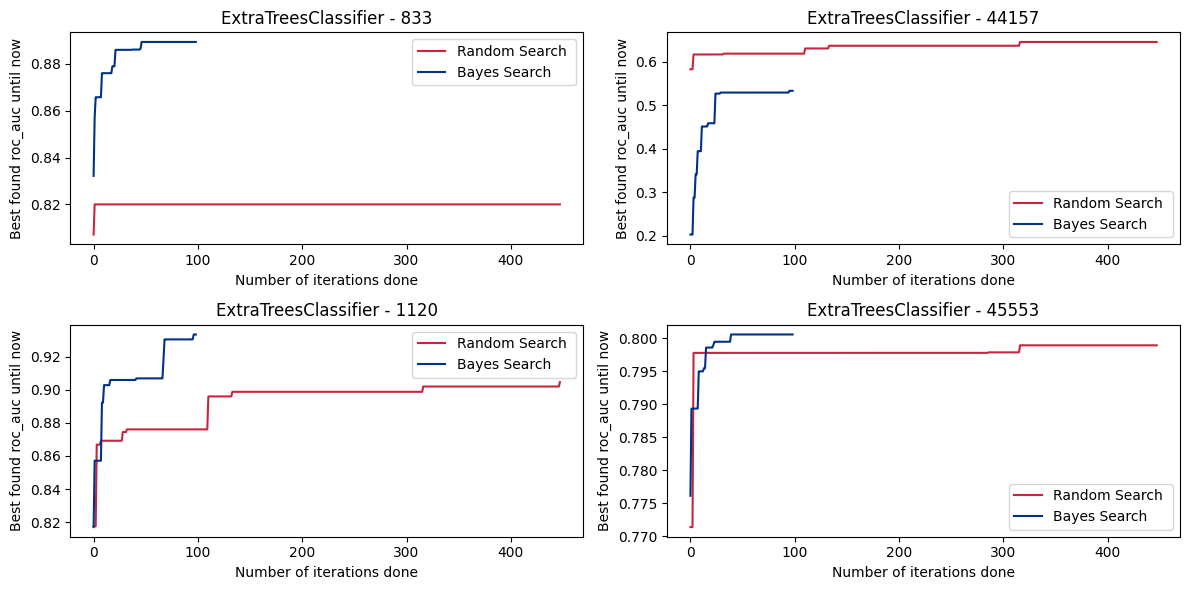

In [66]:
# ExtraTreesClassifier
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].plot(extra_trees_max_auc_interations_1_random, color='#C7253E', label='Random Search ')
axs[0, 0].plot(extra_trees_max_auc_interations_1_bayes, color='#003285', label='Bayes Search ')
axs[0, 0].set_title('ExtraTreesClassifier - 833')
axs[0, 0].set_xlabel('Number of iterations done')
axs[0, 0].set_ylabel('Best found roc_auc until now')
axs[0, 0].legend()

axs[0, 1].plot(extra_trees_max_auc_interations_2_random, color='#C7253E', label='Random Search ')
axs[0, 1].plot(extra_trees_max_auc_interations_2_bayes, color='#003285', label='Bayes Search ')
axs[0, 1].set_title('ExtraTreesClassifier - 44157')
axs[0, 1].set_xlabel('Number of iterations done')
axs[0, 1].set_ylabel('Best found roc_auc until now')
axs[0, 1].legend()

axs[1, 0].plot(extra_trees_max_auc_interations_3_random, color='#C7253E', label='Random Search ')
axs[1, 0].plot(extra_trees_max_auc_interations_3_bayes, color='#003285', label='Bayes Search ')
axs[1, 0].set_title('ExtraTreesClassifier - 1120')
axs[1, 0].set_xlabel('Number of iterations done')
axs[1, 0].set_ylabel('Best found roc_auc until now')
axs[1, 0].legend()

axs[1, 1].plot(extra_trees_max_auc_interations_4_random, color='#C7253E', label='Random Search ')
axs[1, 1].plot(extra_trees_max_auc_interations_4_bayes, color='#003285', label='Bayes Search ')
axs[1, 1].set_title('ExtraTreesClassifier - 45553')
axs[1, 1].set_xlabel('Number of iterations done')
axs[1, 1].set_ylabel('Best found roc_auc until now')
axs[1, 1].legend()

plt.tight_layout()
plt.show()